In [133]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [134]:
df = pd.read_csv('/kaggle/input/loan-approval-classification-data/loan_data.csv')

In [135]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [137]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [138]:
## Adjust the case of the columns for orderliness

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.lower()

In [139]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,master,71948.0,0,rent,35000.0,personal,16.02,0.49,3.0,561,no,1
1,21.0,female,high school,12282.0,0,own,1000.0,education,11.14,0.08,2.0,504,yes,0
2,25.0,female,high school,12438.0,3,mortgage,5500.0,medical,12.87,0.44,3.0,635,no,1
3,23.0,female,bachelor,79753.0,0,rent,35000.0,medical,15.23,0.44,2.0,675,no,1
4,24.0,male,master,66135.0,1,rent,35000.0,medical,14.27,0.53,4.0,586,no,1


In [140]:
## Split the data

from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

len(df_train), len(df_val), len(df_test)

(27000, 9000, 9000)

In [141]:
## Adjust the index of the splitted datasets

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [142]:
## The target variable of the splitted datasets

y_train = df_train.loan_status.values
y_val = df_val.loan_status.values
y_test = df_test.loan_status.values

del df_train['loan_status']
del df_val['loan_status']
del df_test['loan_status']

## EDA

In [143]:
## Adjust the index of the fulltrain

df_full_train = df_full_train.reset_index(drop=True)

In [144]:
## Check the percentage of the target variable

df_full_train.loan_status.value_counts(normalize=True)

loan_status
0    0.778056
1    0.221944
Name: proportion, dtype: float64

In [145]:
global_approval_rate = round(df.loan_status.mean(),2)

<Axes: xlabel='loan_status', ylabel='count'>

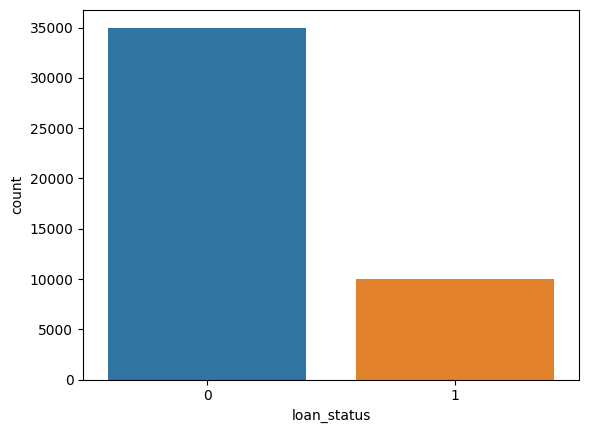

In [146]:
sns.countplot(df, x='loan_status')

In [147]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)

In [148]:
 numerical = ['person_age', 'person_income', 'person_emp_exp',
             'loan_amnt', 'loan_int_rate', 'loan_percent_income', 
             'cb_person_cred_hist_length','credit_score']

In [149]:
df_full_train[categorical].nunique()

person_gender                     2
person_education                  5
person_home_ownership             4
loan_intent                       6
previous_loan_defaults_on_file    2
dtype: int64

<Axes: xlabel='loan_status', ylabel='count'>

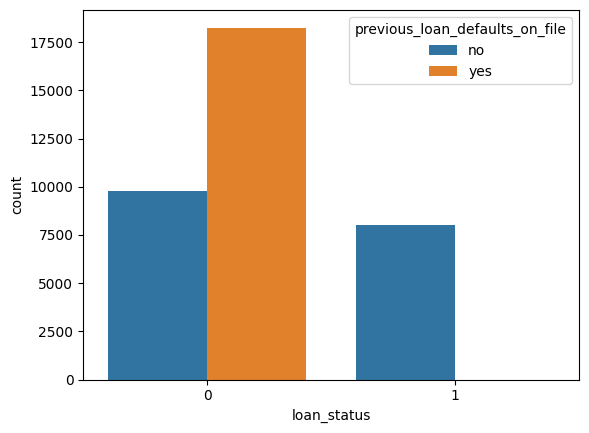

In [150]:
sns.countplot(df_full_train, x='loan_status', hue='previous_loan_defaults_on_file')

<Axes: xlabel='person_gender', ylabel='person_income'>

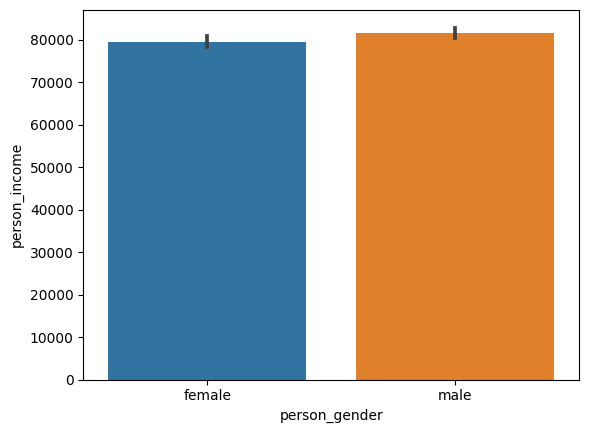

In [151]:
sns.barplot(df_full_train, x='person_gender', y='person_income')

<Axes: xlabel='person_education', ylabel='person_income'>

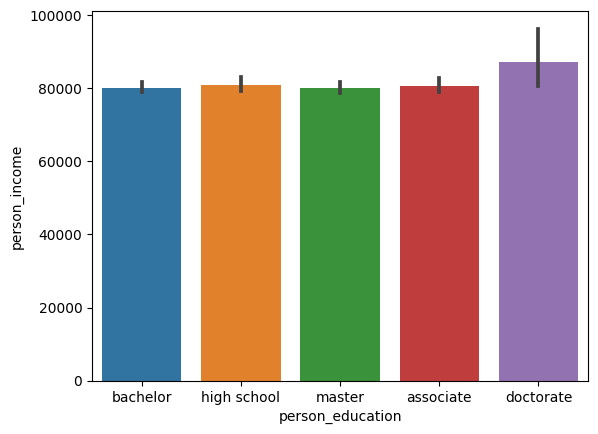

In [152]:
sns.barplot(df_full_train, x='person_education', y='person_income')

In [153]:
loan_apprv_male = df_full_train[df_full_train.person_gender == 'male'].loan_status.mean()
loan_apprv_male

0.22051773729626079

In [154]:
loan_apprv_female = df_full_train[df_full_train.person_gender == 'female'].loan_status.mean()
loan_apprv_female

0.22369152814682075

In [155]:
global_approval_rate - loan_apprv_male

-0.000517737296260784

In [156]:
global_approval_rate - loan_apprv_female

-0.0036915281468207495

In [157]:
from IPython.display import display

In [158]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).loan_status.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_approval_rate
    df_group['risk'] = df_group['mean'] / global_approval_rate
    display(df_group)
    print()
    print()

person_gender


,mean,count,diff,risk
person_gender,,,,
female,0.223692,16183,0.003692,1.016780
male,0.220518,19817,0.000518,1.002353




person_education


,mean,count,diff,risk
person_education,,,,
associate,0.222338,9607,0.002338,1.010627
bachelor,0.221872,10772,0.001872,1.008507
doctorate,0.214286,504,-0.005714,0.974026
high school,0.224968,9508,0.004968,1.022584
master,0.216973,5609,-0.003027,0.986240




person_home_ownership


,mean,count,diff,risk
person_home_ownership,,,,
mortgage,0.115174,14795,-0.104826,0.523518
other,0.313131,99,0.093131,1.423324
own,0.075242,2379,-0.144758,0.342008
rent,0.324451,18727,0.104451,1.474779




loan_intent


,mean,count,diff,risk
loan_intent,,,,
debtconsolidation,0.300646,5731,0.080646,1.366571
education,0.170573,7381,-0.049427,0.775332
homeimprovement,0.263310,3813,0.043310,1.196862
medical,0.278967,6818,0.058967,1.268034
personal,0.201493,6030,-0.018507,0.915875
venture,0.142444,6227,-0.077556,0.647474




previous_loan_defaults_on_file


,mean,count,diff,risk
previous_loan_defaults_on_file,,,,
no,0.450217,17747,0.230217,2.046441
yes,0.000000,18253,-0.220000,0.000000


In [159]:
from sklearn.metrics import mutual_info_score

In [160]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.loan_status)

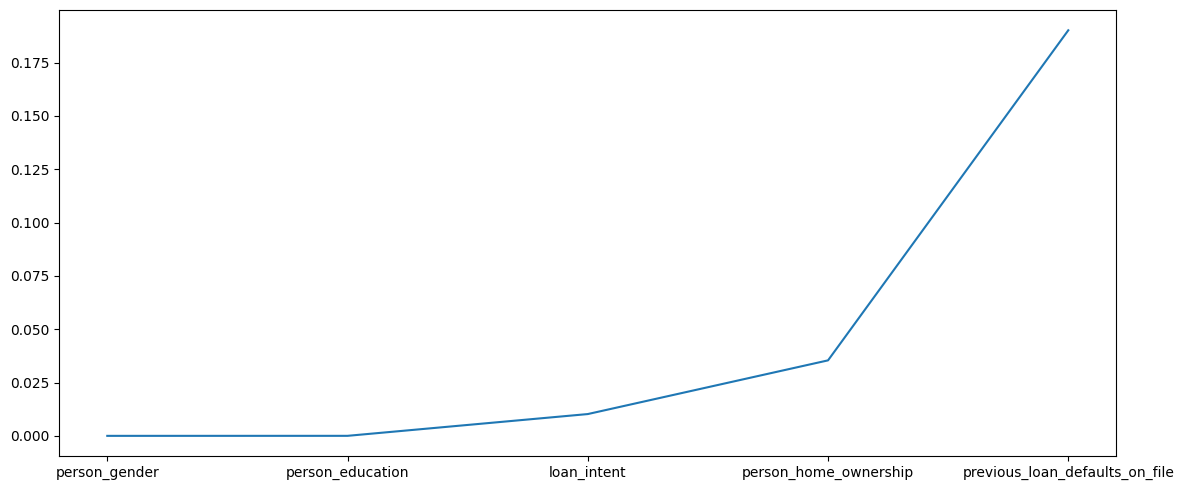

In [161]:
## Plot feature importance for categorical features

mi = df_full_train[categorical].apply(mutual_info_churn_score).sort_values().reset_index()
df_mi = pd.DataFrame(mi)

plt.figure(figsize=(12,5))
plt.plot(df_mi['index'], df_mi[0])
plt.tight_layout()

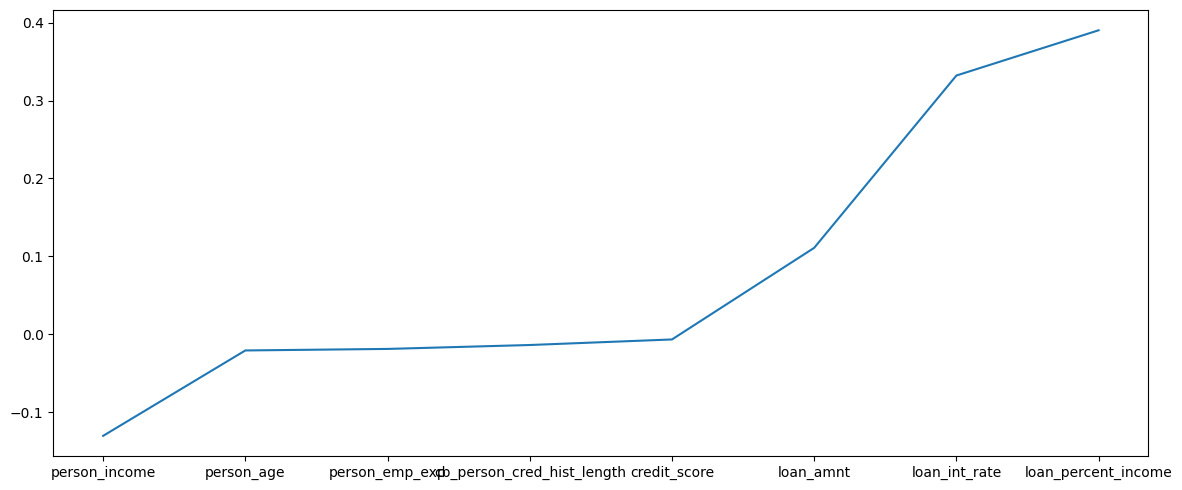

In [162]:
## Plot correlation for numerical features

corr = df_full_train[numerical].corrwith(df_full_train.loan_status).sort_values().reset_index()
df_corr = pd.DataFrame(corr)

plt.figure(figsize=(12,5))
plt.plot(df_corr['index'], df_corr[0])
plt.tight_layout()

In [163]:
## One hot encoding

from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [164]:
train_dict[39]

{'person_gender': 'male',
 'person_education': 'master',
 'person_home_ownership': 'own',
 'loan_intent': 'personal',
 'previous_loan_defaults_on_file': 'yes',
 'person_age': 25.0,
 'person_income': 85320.0,
 'person_emp_exp': 2,
 'loan_amnt': 4000.0,
 'loan_int_rate': 7.42,
 'loan_percent_income': 0.05,
 'cb_person_cred_hist_length': 2.0,
 'credit_score': 709}

## Training the Model

In [165]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_prob = log_model.predict_proba(X_val)[:, 1]
y_pred = log_model.predict(X_val)

In [166]:
from sklearn.metrics import accuracy_score, roc_auc_score

print('Accuracy:',accuracy_score(y_val, y_pred))
print('AUC:',roc_auc_score(y_val, y_prob))

Accuracy: 0.8286666666666667
AUC: 0.8296118739566672


In [167]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_prob = rf_model.predict_proba(X_val)[:, 1]
y_pred = rf_model.predict(X_val)

print('Accuracy:',accuracy_score(y_val, y_pred))
print('AUC:',roc_auc_score(y_val, y_prob))

Accuracy: 0.9272222222222222
AUC: 0.9731524890966845


In [168]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

y_prob = xgb_model.predict_proba(X_val)[:, 1]
y_pred = xgb_model.predict(X_val)

print('Accuracy:',accuracy_score(y_val, y_pred))
print('AUC:',roc_auc_score(y_val, y_prob))

Accuracy: 0.9287777777777778
AUC: 0.9765410652306518


In [169]:
## Hyperparameter tuning for the RandomForest model

import optuna

def objective_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    max_depth = trial.suggest_int('max_depth', 1, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    return accuracy_score(y_val, y_pred)

# Run Optuna
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=5)
print("Best parameters for Random Forest:", study_rf.best_params)

[I 2024-11-27 08:51:24,940] A new study created in memory with name: no-name-3032145c-300b-4045-8657-0c2112847fa1
[I 2024-11-27 08:51:25,657] Trial 0 finished with value: 0.8927777777777778 and parameters: {'n_estimators': 54, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.8927777777777778.
[I 2024-11-27 08:51:25,971] Trial 1 finished with value: 0.9237777777777778 and parameters: {'n_estimators': 13, 'max_depth': 13, 'min_samples_split': 10, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.9237777777777778.
[I 2024-11-27 08:51:26,355] Trial 2 finished with value: 0.922 and parameters: {'n_estimators': 16, 'max_depth': 15, 'min_samples_split': 9, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.9237777777777778.
[I 2024-11-27 08:51:28,638] Trial 3 finished with value: 0.9262222222222222 and parameters: {'n_estimators': 90, 'max_depth': 19, 'min_samples_split': 9, 'min_samples_leaf': 5}. Best is trial 3 with value: 0.9262222222222

Best parameters for Random Forest: {'n_estimators': 90, 'max_depth': 19, 'min_samples_split': 9, 'min_samples_leaf': 5}


In [170]:
rf_model = RandomForestClassifier(
        n_estimators=22,
        max_depth=11,
        min_samples_split=8,
        min_samples_leaf=2,
        random_state=42
    )

rf_model.fit(X_train, y_train)

y_prob = rf_model.predict_proba(X_val)[:, 1]
y_pred = rf_model.predict(X_val)

print('Accuracy:',accuracy_score(y_val, y_pred))
print('AUC:',roc_auc_score(y_val, y_prob))

Accuracy: 0.9244444444444444
AUC: 0.9702067360263672


In [171]:
## Hyperparameter tuning for the XGboost model

import xgboost as xgb

def objective_xgb(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0)
    }

    model = xgb.XGBClassifier(**param, use_label_encoder=False, eval_metric='mlogloss')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    return accuracy_score(y_val, y_pred)

# Run Optuna
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=5)
print("Best parameters for XGBoost:", study_xgb.best_params)

[I 2024-11-27 08:51:30,959] A new study created in memory with name: no-name-8f27fe11-e080-4de0-8c09-94a473b028c5
[I 2024-11-27 08:51:31,252] Trial 0 finished with value: 0.9292222222222222 and parameters: {'max_depth': 5, 'n_estimators': 56, 'learning_rate': 0.17669379073970867, 'subsample': 0.6758653365712974}. Best is trial 0 with value: 0.9292222222222222.
[I 2024-11-27 08:51:31,629] Trial 1 finished with value: 0.9326666666666666 and parameters: {'max_depth': 8, 'n_estimators': 92, 'learning_rate': 0.15231666901596558, 'subsample': 0.7554203574269029}. Best is trial 1 with value: 0.9326666666666666.
[I 2024-11-27 08:51:32,390] Trial 2 finished with value: 0.9298888888888889 and parameters: {'max_depth': 10, 'n_estimators': 158, 'learning_rate': 0.10139289789117216, 'subsample': 0.7968329330920515}. Best is trial 1 with value: 0.9326666666666666.
[I 2024-11-27 08:51:32,579] Trial 3 finished with value: 0.9284444444444444 and parameters: {'max_depth': 3, 'n_estimators': 96, 'learnin

Best parameters for XGBoost: {'max_depth': 8, 'n_estimators': 92, 'learning_rate': 0.15231666901596558, 'subsample': 0.7554203574269029}


In [172]:
xgb_model = xgb.XGBClassifier(max_depth=7, 
                              n_estimators=134, 
                              learning_rate=0.0930216167139532, 
                              subsample=0.8186041263945996, 
                              use_label_encoder=False, 
                              eval_metric='mlogloss')

xgb_model.fit(X_train, y_train)

y_prob = xgb_model.predict_proba(X_val)[:, 1]
y_pred = xgb_model.predict(X_val)

print('Accuracy:',accuracy_score(y_val, y_pred))
print('AUC:',roc_auc_score(y_val, y_prob))

Accuracy: 0.9302222222222222
AUC: 0.9770976756527329


# Choosing the Random Forest Model

In [173]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)

X_full_train = dv.fit_transform(dicts_full_train)
y_full_train = df_full_train.loan_status.values

In [174]:
model = RandomForestClassifier(
        n_estimators=22,
        max_depth=11,
        min_samples_split=8,
        min_samples_leaf=2,
        random_state=42
    )

model.fit(X_full_train, y_full_train)

RandomForestClassifier(max_depth=11, min_samples_leaf=2, min_samples_split=8,
                       n_estimators=22, random_state=42)

In [175]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(dicts_test)

y_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

print('Accuracy:',accuracy_score(y_test, y_pred))
print('AUC:',roc_auc_score(y_test, y_prob))

Accuracy: 0.9237777777777778
AUC: 0.9692243717037131


## Using the Model

In [176]:
applicant = dicts_test[-780]

In [177]:
X_sample = dv.transform(applicant)

In [178]:
model.predict_proba(X_sample)[:,1] 

array([0.96946716])

In [179]:
y_test[-780]

1